In [1]:
cd ..

/home/abhishekabhishek/git/UnsupGenModbyMPS


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml
from pennylane import numpy as pnp

from MPScumulant import MPS_c
import mps_circuit_helpers
import mps_circuit
import metrics

In [3]:
%load_ext autoreload

Load the trained MPS

In [4]:
%autoreload
m = MPS_c(16, max_bond_dim=2)
m.loadMPS('BS-2-MPS')

# check the properties of the matrices in the MPS
for i in range(len(m.matrices)):
    tn_core = m.matrices[i]
    print(i, tn_core.shape)

0 (1, 2, 2)
1 (2, 2, 2)
2 (2, 2, 2)
3 (2, 2, 2)
4 (2, 2, 2)
5 (2, 2, 2)
6 (2, 2, 2)
7 (2, 2, 2)
8 (2, 2, 2)
9 (2, 2, 2)
10 (2, 2, 2)
11 (2, 2, 2)
12 (2, 2, 2)
13 (2, 2, 2)
14 (2, 2, 2)
15 (2, 2, 1)


In [5]:
mps_circuit_helpers.are_isometries(m)

idx, core tensor shape, left isometry, right isometry
0 (1, 2, 2) True True
1 (2, 2, 2) True False
2 (2, 2, 2) True False
3 (2, 2, 2) True False
4 (2, 2, 2) True False
5 (2, 2, 2) True False
6 (2, 2, 2) True False
7 (2, 2, 2) True False
8 (2, 2, 2) True False
9 (2, 2, 2) True False
10 (2, 2, 2) True False
11 (2, 2, 2) True False
12 (2, 2, 2) True False
13 (2, 2, 2) True False
14 (2, 2, 2) False False
15 (2, 2, 1) False False


In [6]:
%autoreload
mps_unitaries = mps_circuit_helpers.get_mps_unitaries(m)

padding the mps core tensors
idx, shape of the padded tensor, updated bond dimension
i = 1, (2, 2, 2), 2
i = 2, (2, 2, 2), 2
i = 3, (2, 2, 2), 2
i = 4, (2, 2, 2), 2
i = 5, (2, 2, 2), 2
i = 6, (2, 2, 2), 2
i = 7, (2, 2, 2), 2
i = 8, (2, 2, 2), 2
i = 9, (2, 2, 2), 2
i = 10, (2, 2, 2), 2
i = 11, (2, 2, 2), 2
i = 12, (2, 2, 2), 2
i = 13, (2, 2, 2), 2
i = 14, (2, 2, 2), 2
left canonicalizing the padded MPS
bond: 0
bond: 1
bond: 2
bond: 3
bond: 4
bond: 5
bond: 6
bond: 7
bond: 8
bond: 9
bond: 10
bond: 11
bond: 12
bond: 13
bond: 14


Generate samples from the trained MPS

In [8]:
m.left_cano()
m.generate_sample()

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int8)

In [10]:
samples = np.zeros((30, 4, 4), dtype=np.int8)
for i in range(samples.shape[0]):
    samples[i] = m.generate_sample().reshape(4, 4)

Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1
Frequency : 1


(<Figure size 1296x1080 with 30 Axes>, <Axes: >)

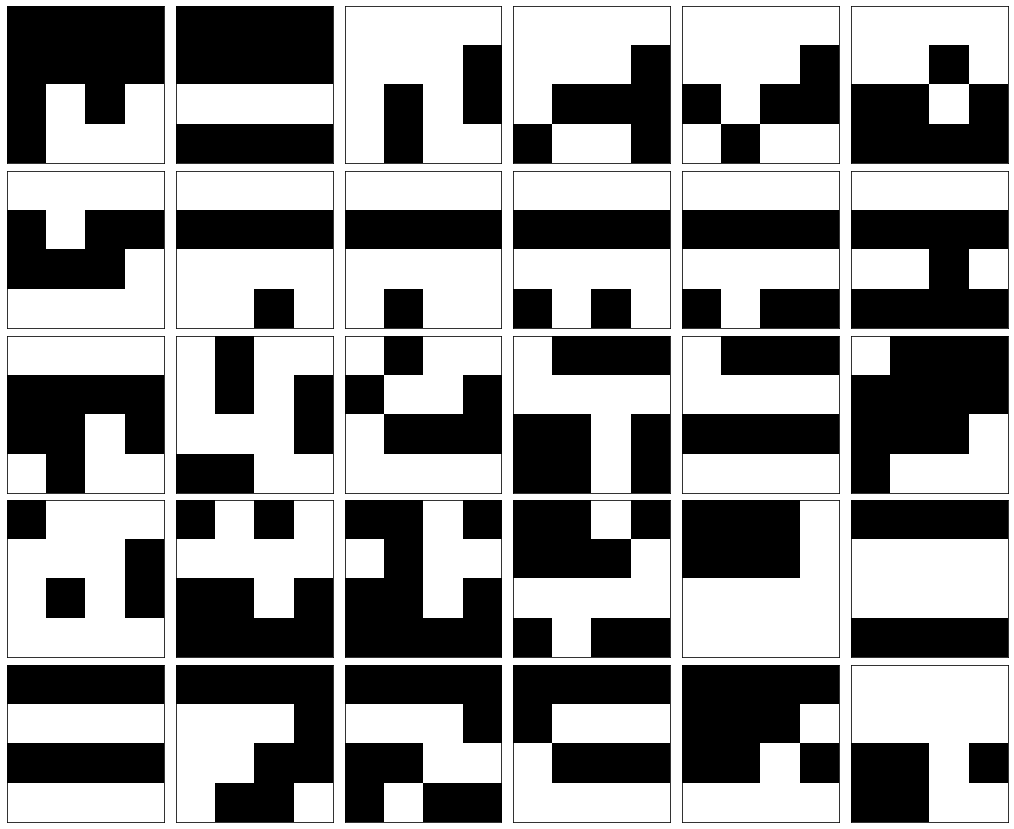

In [11]:
%autoreload
metrics.plot_top_samples(samples)

The chi = 2 MPS clearly does not capture the dataset but is able to generate some bars and stripes. Let's try to extract a KL-divergence value from the MPS

In [35]:
states = np.arange(2**16, dtype=int)
bin_states = np.zeros((2**16, 16), dtype=int)

for i in range(states.shape[0]):
    bin_states[i] = np.array(list(np.binary_repr(states[i], width=16)),
                             dtype=int)

In [36]:
bin_states

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [38]:
mps_probs = m.Give_probab(bin_states)

In [39]:
mps_probs

array([0.00380636, 0.00073879, 0.00132806, ..., 0.000998  , 0.00025165,
       0.00575008])

In [46]:
data = np.load('BStest/BSdata.npy')
data_states = data.reshape(-1, 16).astype(np.int8)

In [47]:
mps_probs_states = m.Give_probab(data_states)

In [49]:
%autoreload
metrics.kl_divergence_synergy_paper(30, mps_probs_states)

Array(5.105069, dtype=float32)

The above is similar to the value we have in the synergy paper 